<a href="https://colab.research.google.com/github/Faye0242/Cross-Boarder-E-commerce/blob/main/%E5%AE%A2%E6%88%B7%E6%B5%81%E5%A4%B1%E9%A2%84%E6%B5%8B%E9%A1%B9%E7%9B%AE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 客户流失预测项目陈述

## Motivation 动机
在运营任何一种产品时，客户流失预测是至关重要的，留住现有客户的成本远低于获得新客户的成本，也可以从用户侧对产品目前的表现作出真实的综合评估。通过总结流失用户的画像，预测哪些客户可能会离开，公司可以针对这些高风险用户采取挽留措施（折扣、个性化优惠、改进服务），从而提高整体投资回报率和盈利能力。

从数据科学的角度来看，这个问题也很有意义：它结合了不同的数据（人口统计、使用情况、交易），可以通过强大的传统ML建模（逻辑回归、树集成等）来捕捉表明脱离的微妙信号。


## Related Work 相关工作
专注于使用客户人口统计和相关账户数据预测客户流失，以确定保留活动的优先级并提高客户生命周期价值。


### References 潜在的引用

1. 客户流失预测：利用数据提高留存率，https://www.braze.com/resources/articles/churn-prediction

2. 使用机器学习的客户流失分析，https://www.sciencedirect.com/science/article/pii/S2666603023000143

3. 客户流失预测与模型可解释性研究，https://pmc.ncbi.nlm.nih.gov/articles/PMC10707658

## Data 数据
•数据集：电信客户流失（huggingface）

•链接：https://huggingface.co/datasets/aai510-group1/telco-customer-churn

•大小：7,043行，49列

•结构：单个CSV表（每个客户一行）

•数据主要特点：

- 人口统计：性别、老年人、伴侣、家属
- 帐户信息：期限，合同类型，每月收费，总收费，付款方式
- 使用的服务：电话、互联网、流媒体、技术支持
- 目标变量：流失率（是/否）

•数据质量：需要进行少量清理和标准化（One-hot分类编码）。

## Questions 问题
1.  谁可能会流失？
•仅使用人口统计数据和帐户信息构建基线分类器。
2.  哪些特征最具预测性？
•确定最重要的预测因素（例如，任期、合同类型、月租费）。
3.  哪个客户群面临的风险最大？
•简单细分（例如，根据合同类型或保留期划分），看看哪些群体的流失率最高。

## Assumptions 可能的发现及影响

*   较短的任期或按月合同可能预示着用户流失
*   每月费用较高的客户可能面临更大的风险
*   调查结果可用于有针对性的留存活动（例如，对高风险群体的奖励）。

## Part1. 数据清理（检查类型、缺失值比例、异常列）

In [2]:
import pandas as pd

splits = {'train': 'train.csv', 'validation': 'validation.csv', 'test': 'test.csv'}
df = pd.read_csv("hf://datasets/aai510-group1/telco-customer-churn/" + splits["train"])


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4225 entries, 0 to 4224
Data columns (total 52 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                4225 non-null   int64  
 1   Avg Monthly GB Download            4225 non-null   int64  
 2   Avg Monthly Long Distance Charges  4225 non-null   float64
 3   Churn Category                     1121 non-null   object 
 4   Churn Reason                       1121 non-null   object 
 5   Churn Score                        4225 non-null   int64  
 6   City                               4225 non-null   object 
 7   CLTV                               4225 non-null   int64  
 8   Contract                           4225 non-null   object 
 9   Country                            4225 non-null   object 
 10  Customer ID                        4225 non-null   object 
 11  Customer Status                    4225 non-null   objec

### - Check for missing values

In [4]:
df.isna().sum()

,0
Age,0
Avg Monthly GB Download,0
Avg Monthly Long Distance Charges,0
Churn Category,3104
Churn Reason,3104
Churn Score,0
City,0
CLTV,0
Contract,0
Country,0


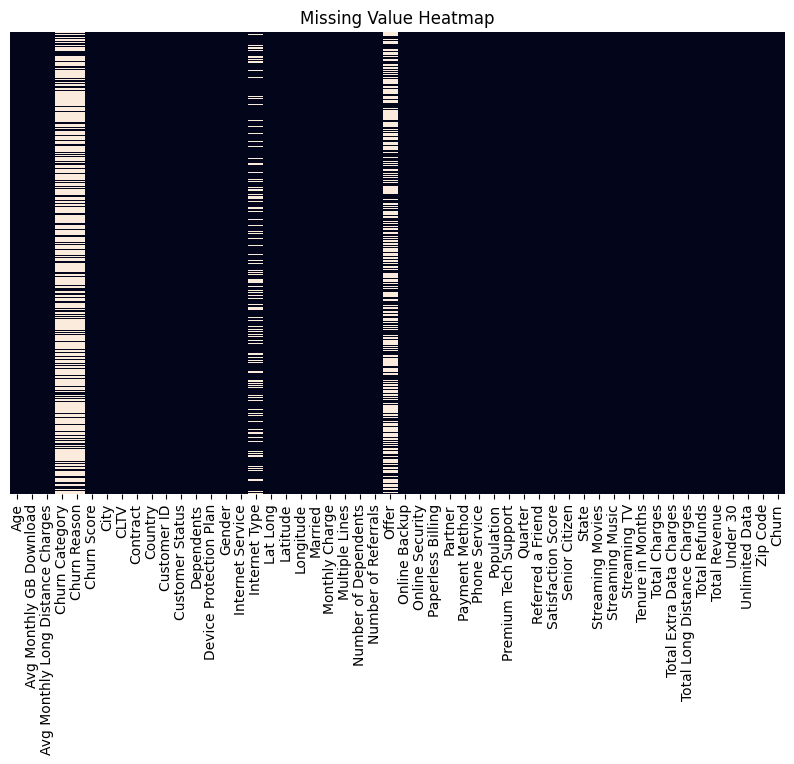

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False)
plt.title("Missing Value Heatmap")
plt.show()

In [6]:
## 删除高缺失列
drop_cols = ['Churn Category', 'Churn Reason', 'Offer']
df_eda = df.drop(columns=drop_cols, errors='ignore')
## 对少量缺失的类别型变量填充“Unknown”
cat_cols = df_eda.select_dtypes(include='object').columns
df_eda[cat_cols] = df_eda[cat_cols].fillna("Unknown")
## 对数值型变量用中位数填充
num_cols = df_eda.select_dtypes(include=['int64', 'float64']).columns
df_eda[num_cols] = df_eda[num_cols].fillna(df_eda[num_cols].median())

In [7]:
df_eda.info()
df_eda.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4225 entries, 0 to 4224
Data columns (total 49 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                4225 non-null   int64  
 1   Avg Monthly GB Download            4225 non-null   int64  
 2   Avg Monthly Long Distance Charges  4225 non-null   float64
 3   Churn Score                        4225 non-null   int64  
 4   City                               4225 non-null   object 
 5   CLTV                               4225 non-null   int64  
 6   Contract                           4225 non-null   object 
 7   Country                            4225 non-null   object 
 8   Customer ID                        4225 non-null   object 
 9   Customer Status                    4225 non-null   object 
 10  Dependents                         4225 non-null   int64  
 11  Device Protection Plan             4225 non-null   int64

,Age,Avg Monthly GB Download,Avg Monthly Long Distance Charges,Churn Score,CLTV,Dependents,Device Protection Plan,Internet Service,Latitude,Longitude,...,Tenure in Months,Total Charges,Total Extra Data Charges,Total Long Distance Charges,Total Refunds,Total Revenue,Under 30,Unlimited Data,Zip Code,Churn
count,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,...,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000
mean,46.451124,20.740828,22.766963,58.281183,4409.751243,0.233136,0.346982,0.790296,36.207274,-119.768187,...,32.681893,2306.078107,6.965680,754.719141,1.953846,3065.809082,0.200000,0.677870,93491.892781,0.265325
std,16.731518,20.366105,15.429992,21.197931,1170.599119,0.422878,0.476066,0.407146,2.471090,2.154078,...,24.621041,2271.448881,25.250169,854.909725,7.814374,2884.817379,0.400047,0.467348,1863.337187,0.441559
min,19.000000,0.000000,0.000000,5.000000,2003.000000,0.000000,0.000000,0.000000,32.555828,-124.301372,...,1.000000,18.800000,0.000000,0.000000,0.000000,21.360000,0.000000,0.000000,90001.000000,0.000000
25%,32.000000,4.000000,9.050000,40.000000,3493.000000,0.000000,0.000000,1.000000,33.994524,-121.788090,...,9.000000,401.500000,0.000000,67.680000,0.000000,592.750000,0.000000,0.000000,92102.000000,0.000000
50%,46.000000,17.000000,22.570000,61.000000,4531.000000,0.000000,0.000000,1.000000,36.205465,-119.622676,...,30.000000,1424.600000,0.000000,396.640000,0.000000,2151.470000,0.000000,1.000000,93513.000000,0.000000
75%,60.000000,27.000000,36.170000,75.000000,5381.000000,0.000000,1.000000,1.000000,38.196497,-117.991372,...,56.000000,3846.750000,0.000000,1200.000000,0.000000,4845.750000,0.000000,1.000000,95337.000000,1.000000
max,80.000000,85.000000,49.990000,96.000000,6500.000000,1.000000,1.000000,1.000000,41.962127,-114.192901,...,72.000000,8672.450000,150.000000,3564.000000,49.790000,11979.340000,1.000000,1.000000,96150.000000,1.000000


## Part2. EDA探索性数据分析

### 2.1 查看每个数值型变量的分布（判断是否偏态 / 异常值）：

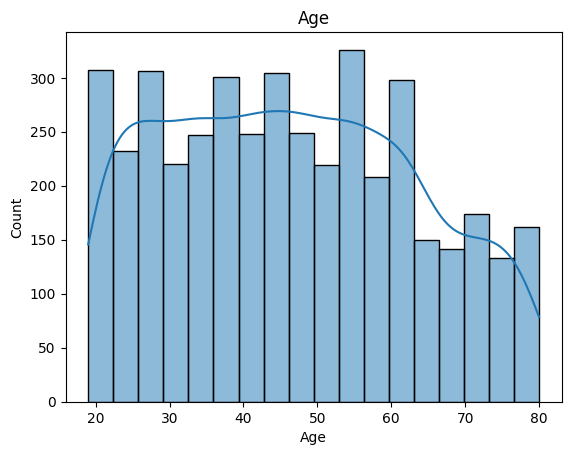

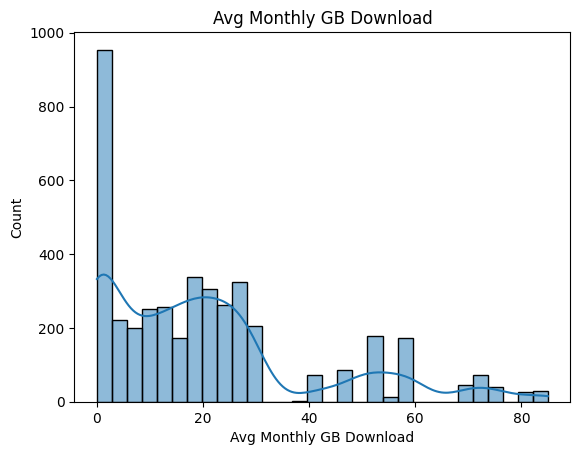

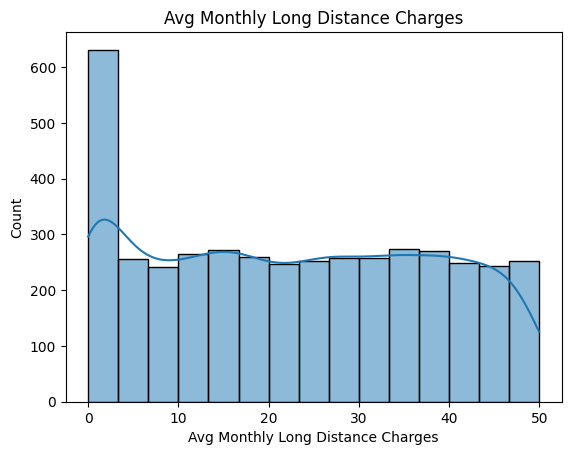

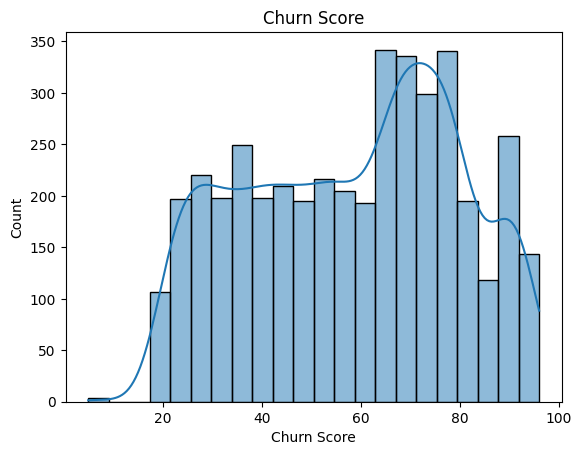

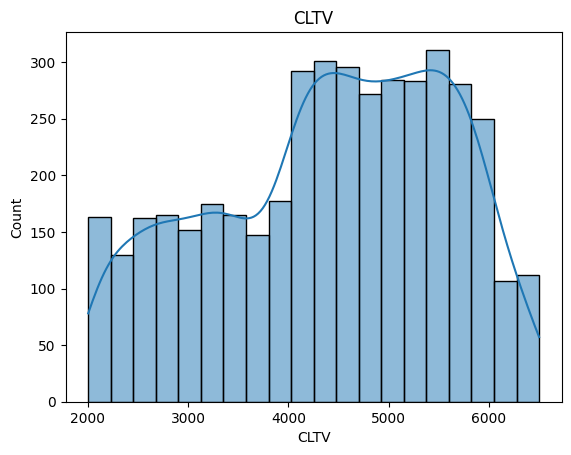

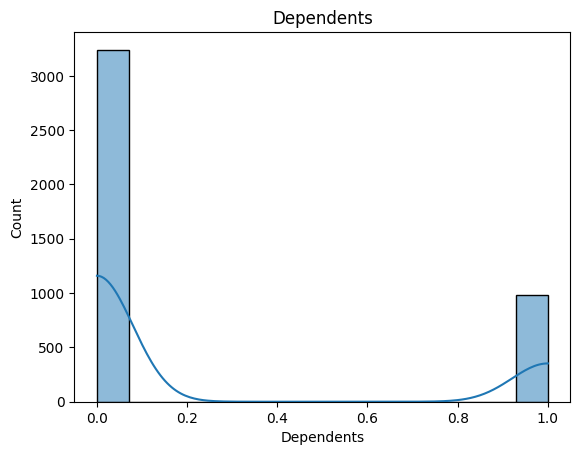

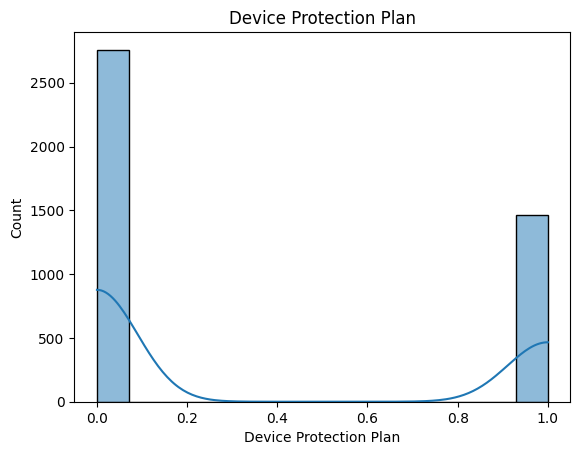

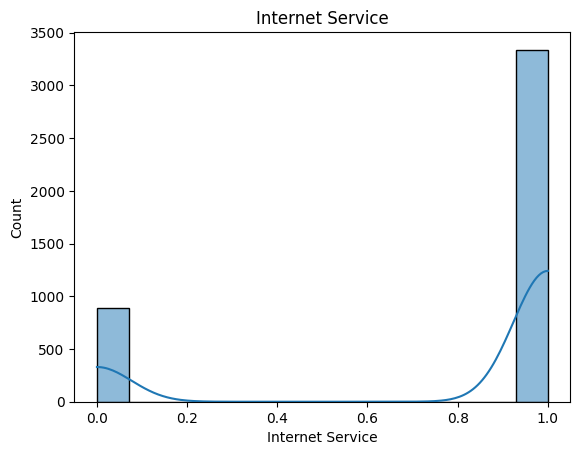

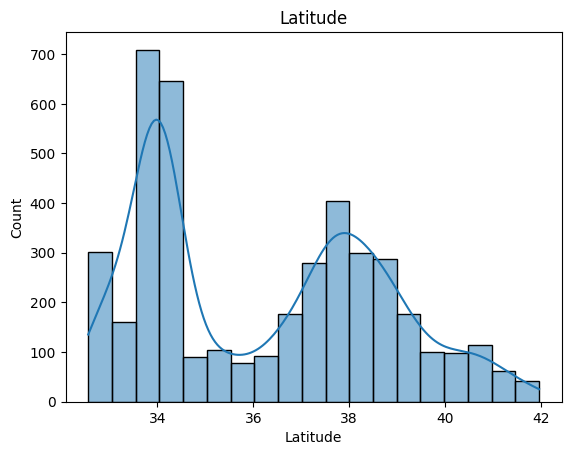

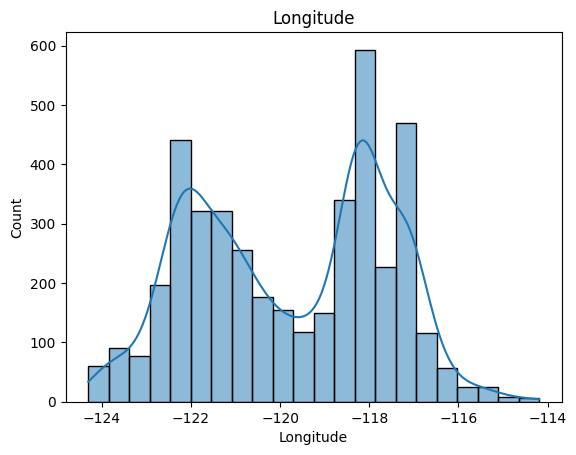

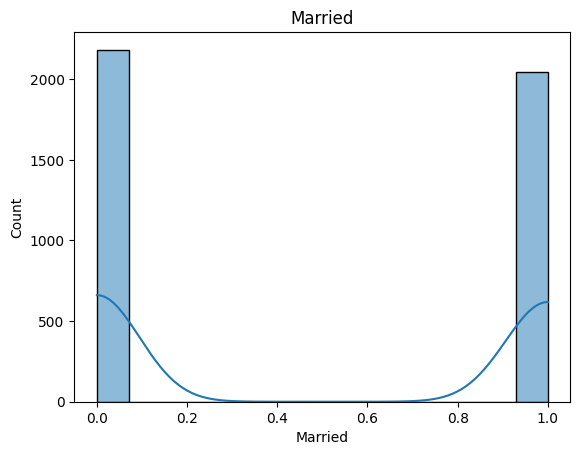

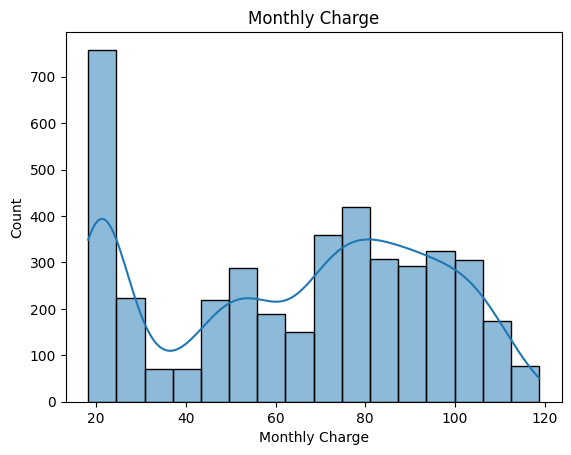

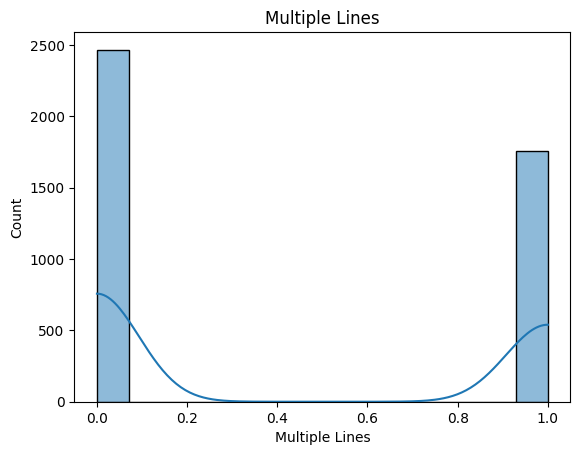

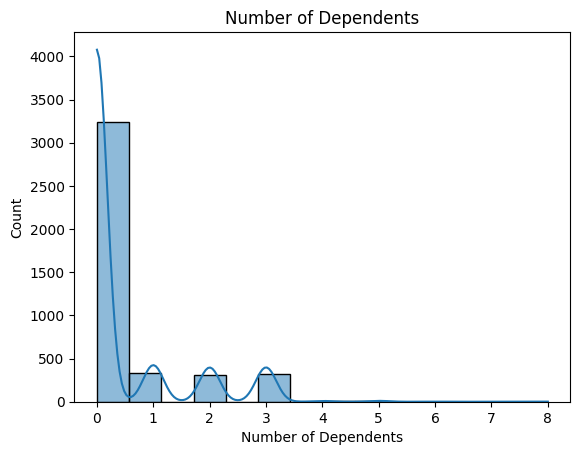

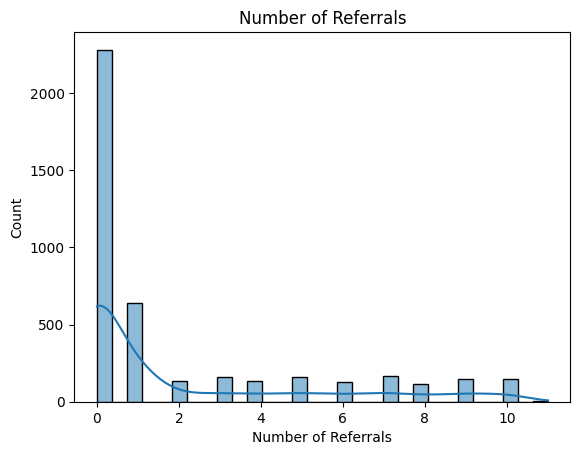

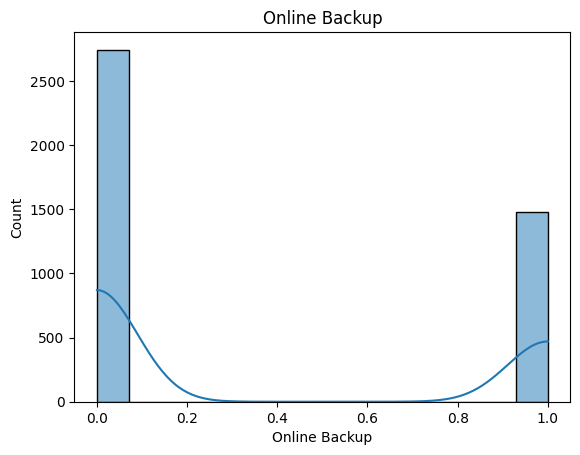

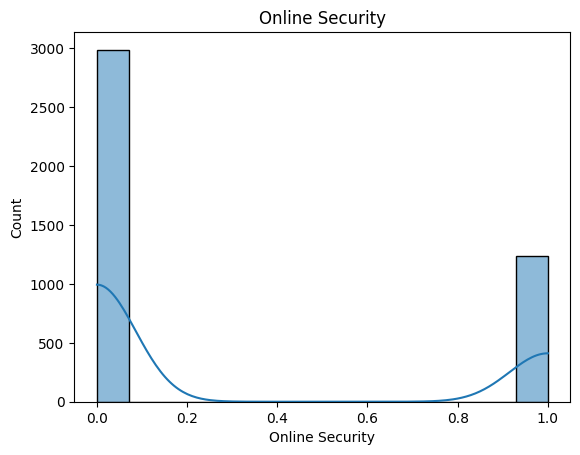

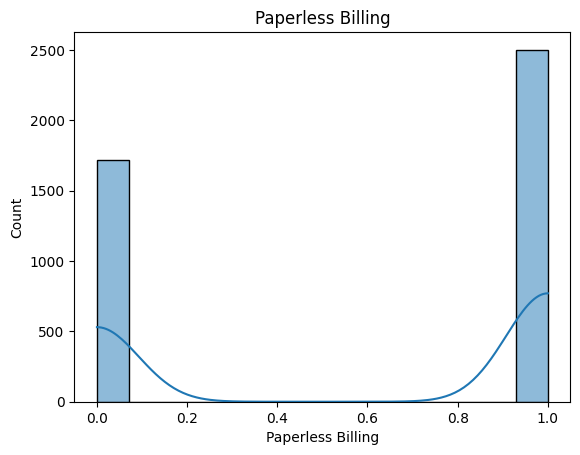

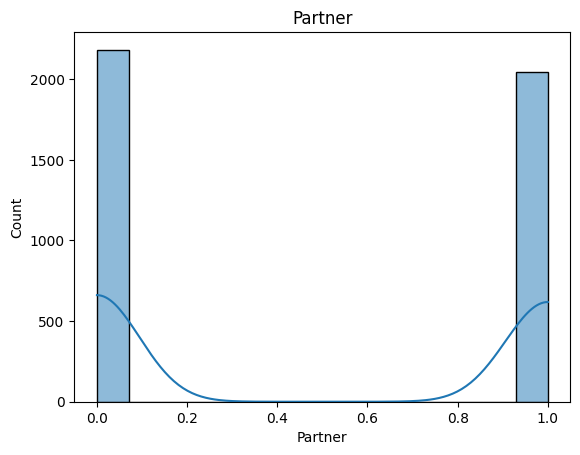

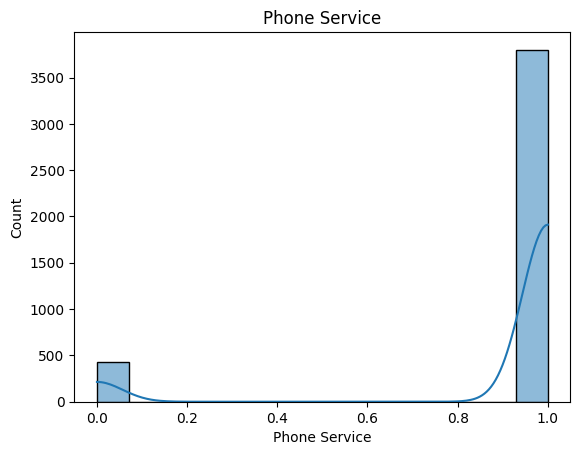

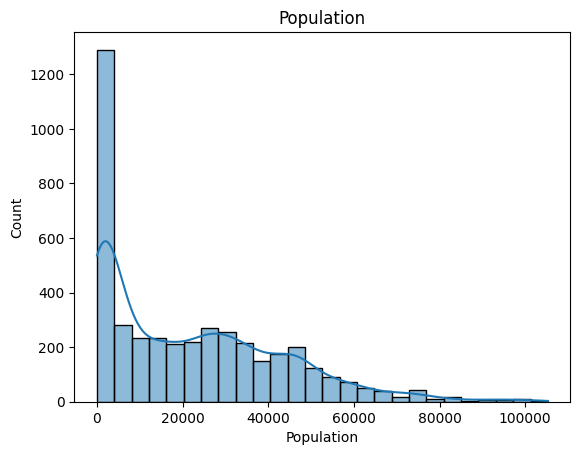

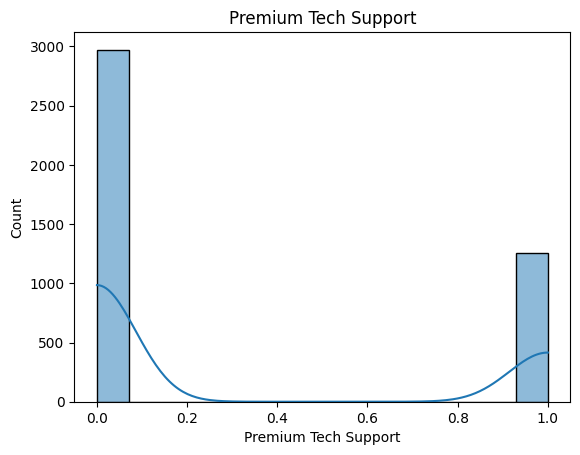

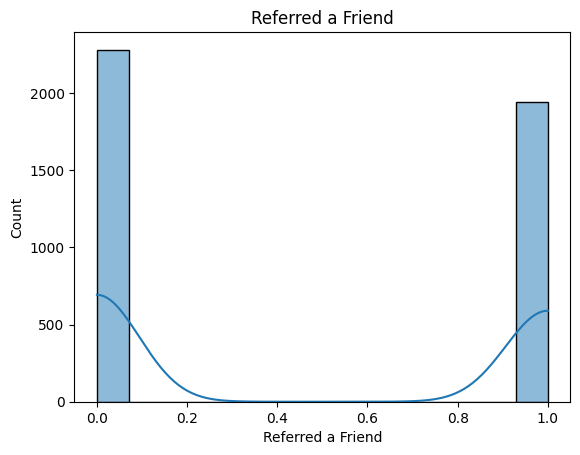

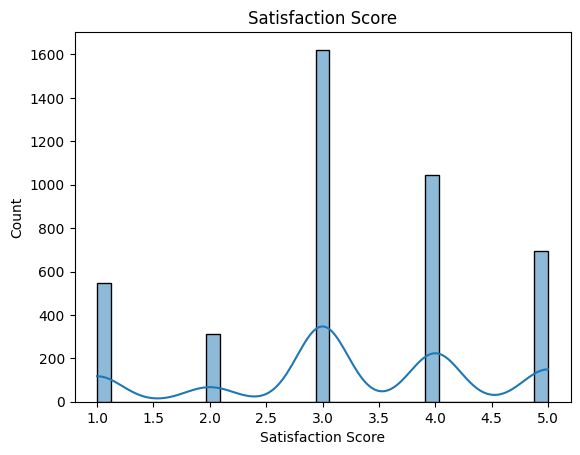

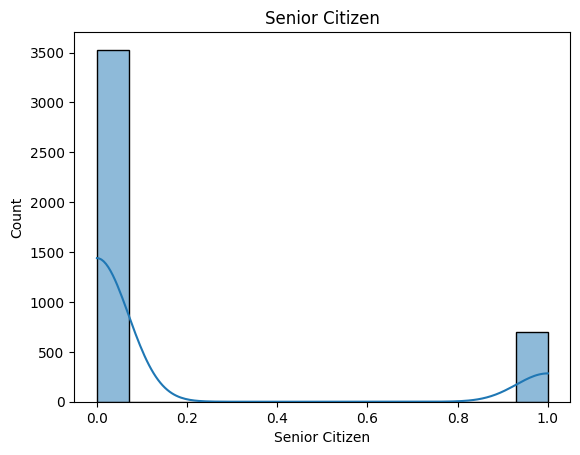

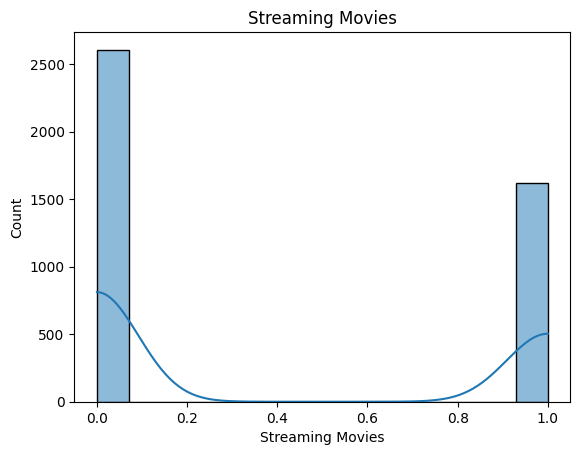

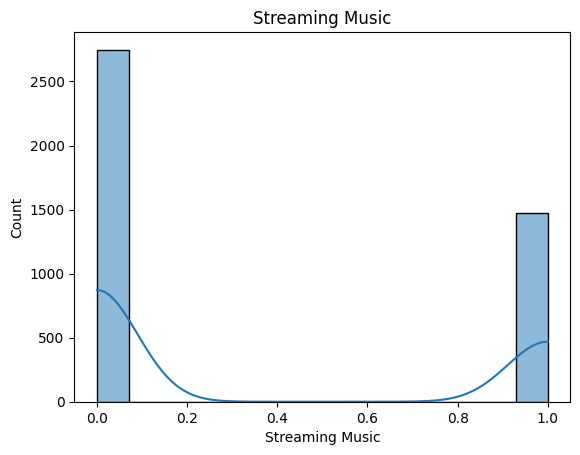

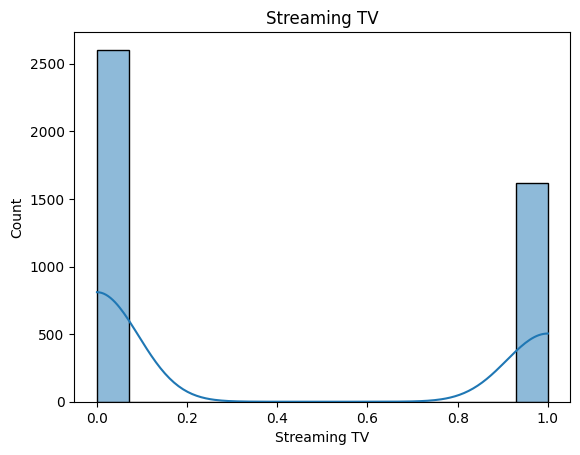

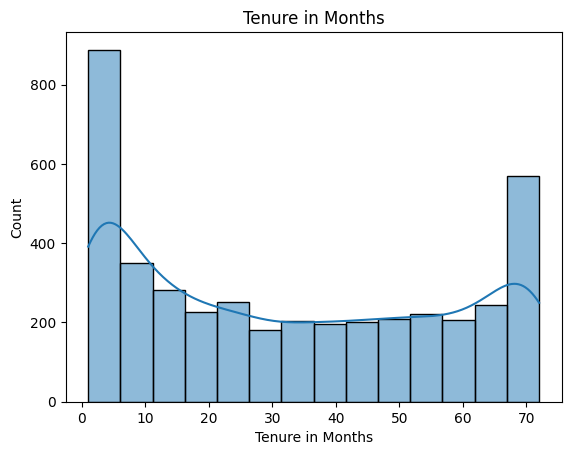

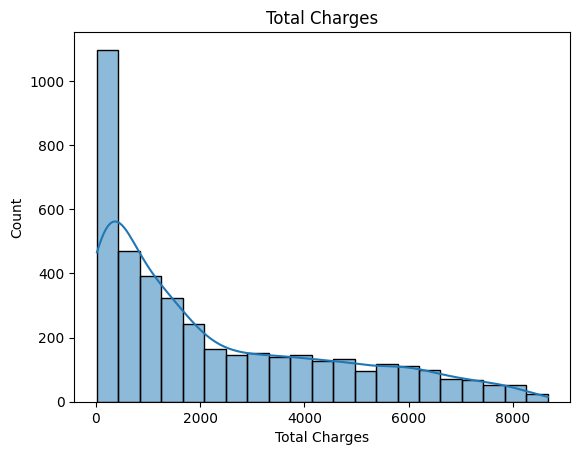

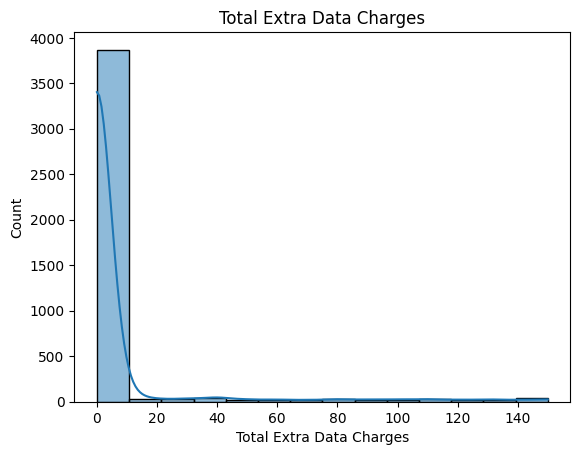

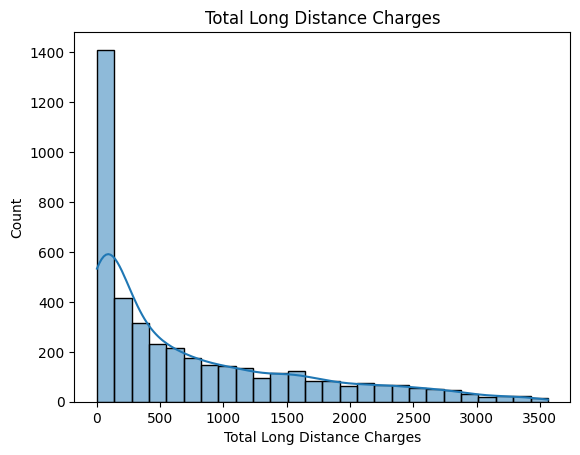

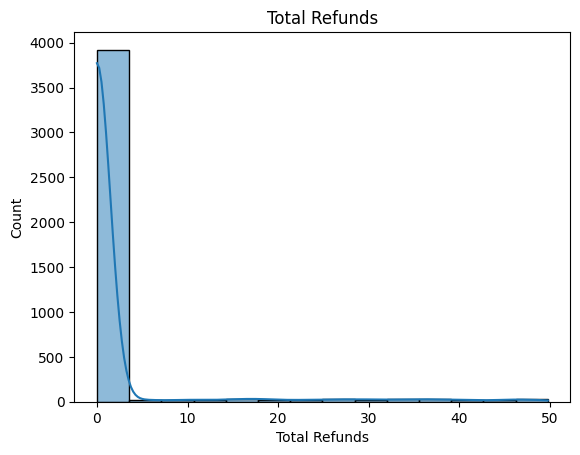

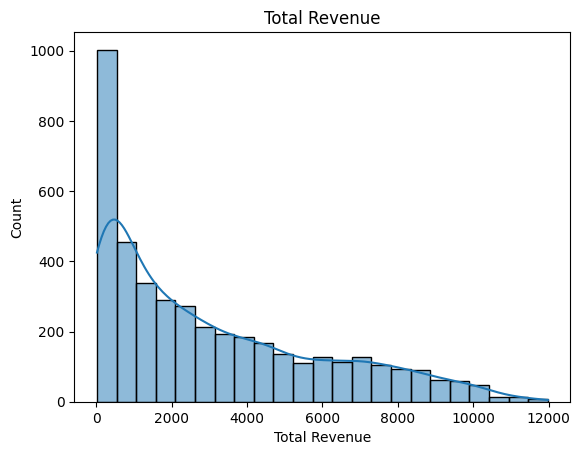

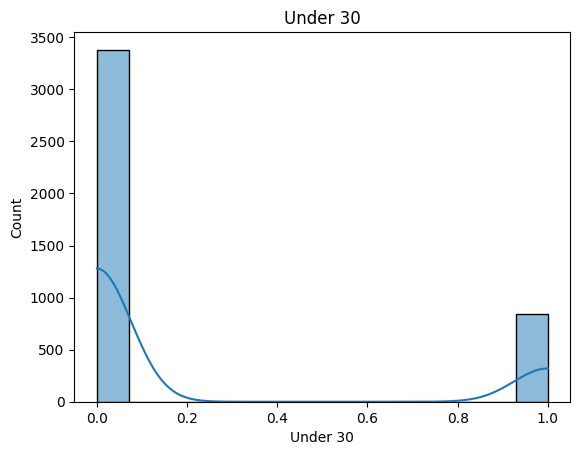

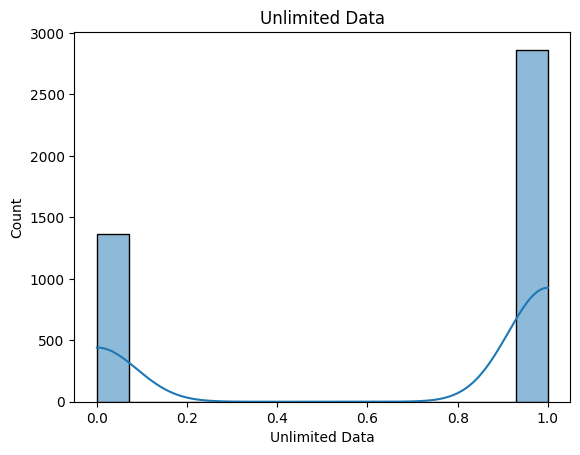

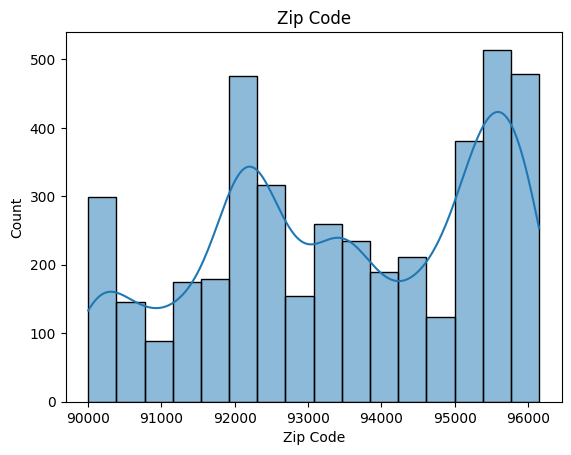

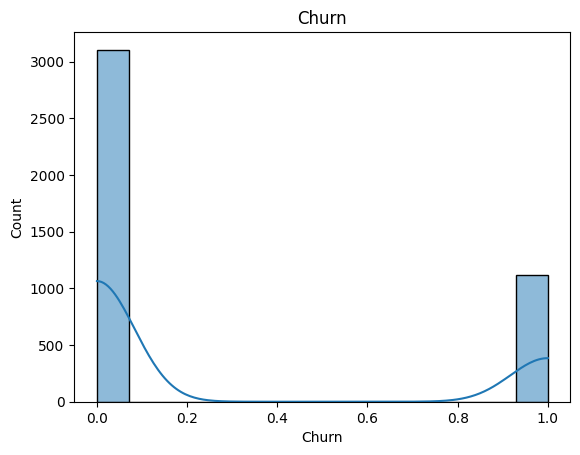

In [8]:
num_cols = df_eda.select_dtypes(include=['int64', 'float64']).columns

for col in num_cols:
    sns.histplot(df_eda[col], kde=True)
    plt.title(col)
    plt.show()


### 可以发现有一些变量虽然是数值，但也属于类别变量（eg. 只有0或者1）
为后续pandas + sklearn 的 pipeline使用便利，我将这些特殊的数值变量也改为分类变量（categorical）

In [9]:
## 识别
binary_cols = [col for col in df_eda.columns
               if df_eda[col].nunique() == 2 and df_eda[col].dtype in ['int64', 'float64']]
print(binary_cols)

## 转换
for col in binary_cols:
    df_eda[col] = df_eda[col].astype('category')
## 修改成category后，许多模型（如 LightGBM、CatBoost）能直接识别


## 转换 object -> category
for c in df_eda.select_dtypes(include=['object']).columns:
    if c != 'Churn':
        df_eda[c] = df_eda[c].astype('category')


## 机器学习模型都要求目标变量（y）是数值型
## 所以在建模前，应该把它改回来
df_eda['Churn'] = df_eda['Churn'].astype('int64')
df_eda.info()


['Dependents', 'Device Protection Plan', 'Internet Service', 'Married', 'Multiple Lines', 'Online Backup', 'Online Security', 'Paperless Billing', 'Partner', 'Phone Service', 'Premium Tech Support', 'Referred a Friend', 'Senior Citizen', 'Streaming Movies', 'Streaming Music', 'Streaming TV', 'Under 30', 'Unlimited Data', 'Churn']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4225 entries, 0 to 4224
Data columns (total 49 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   Age                                4225 non-null   int64   
 1   Avg Monthly GB Download            4225 non-null   int64   
 2   Avg Monthly Long Distance Charges  4225 non-null   float64 
 3   Churn Score                        4225 non-null   int64   
 4   City                               4225 non-null   category
 5   CLTV                               4225 non-null   int64   
 6   Contract                           4

### 2.2 类别变量分布

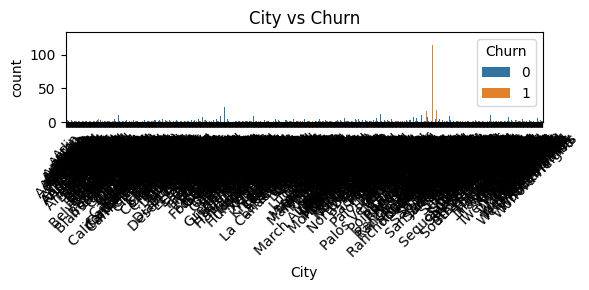

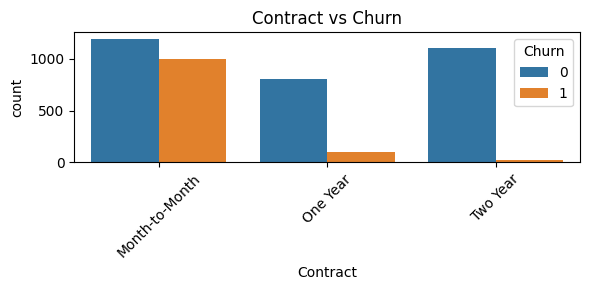

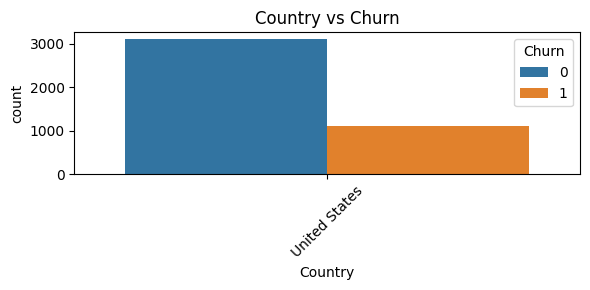

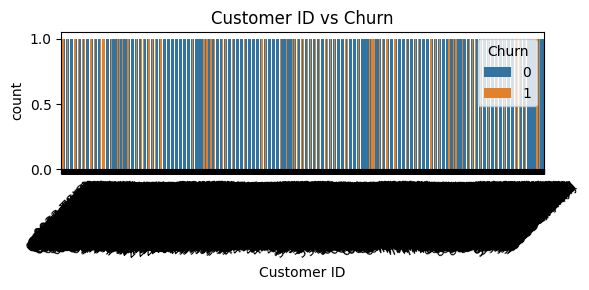

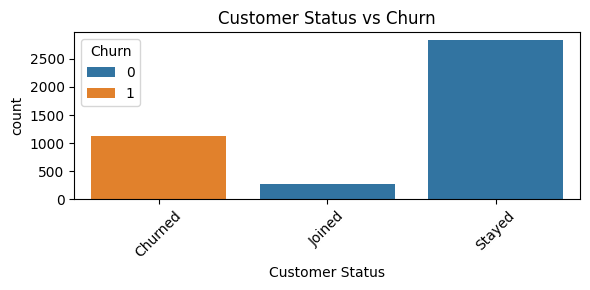

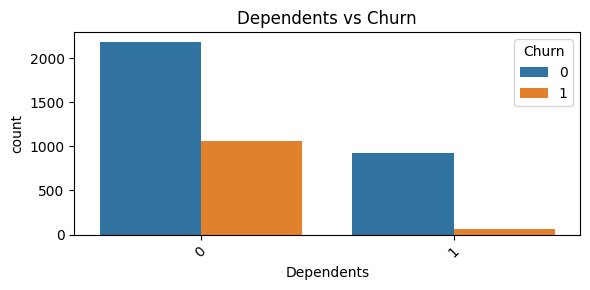

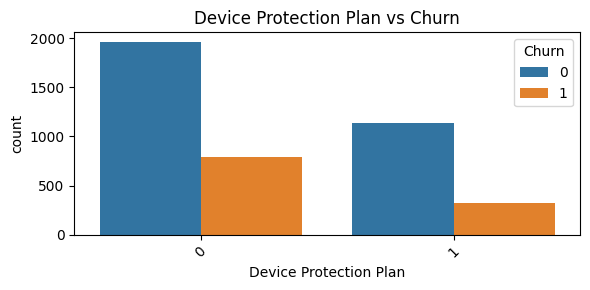

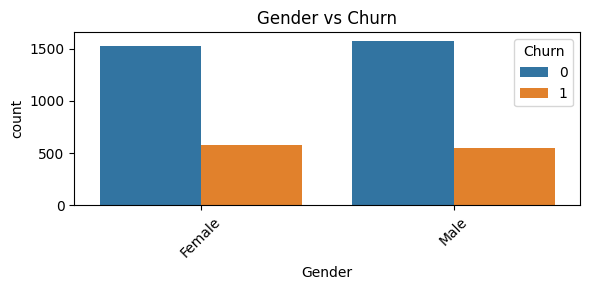

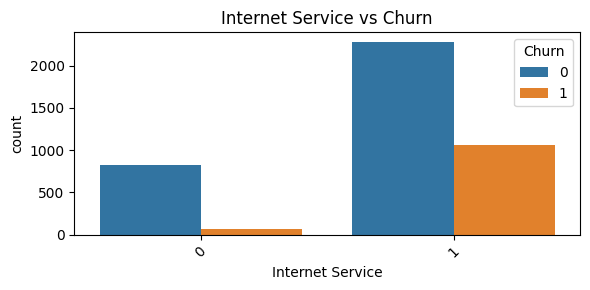

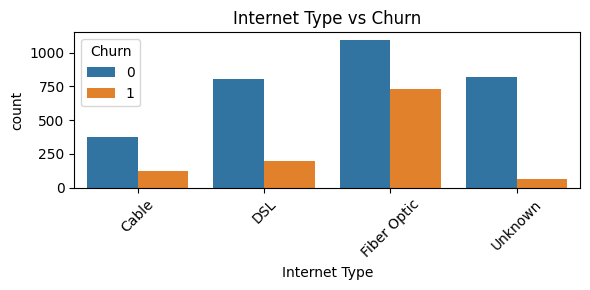

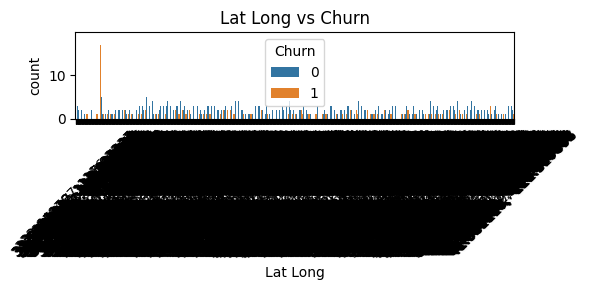

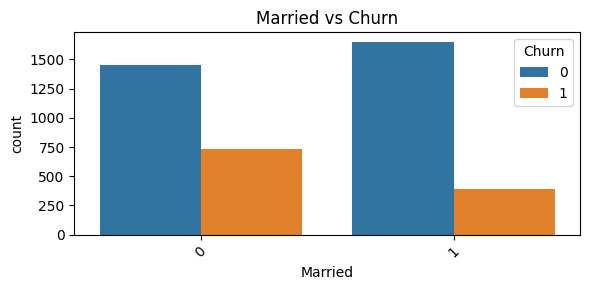

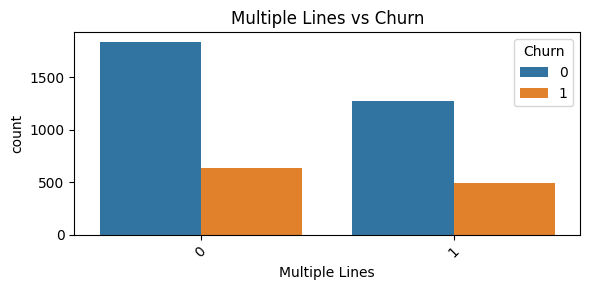

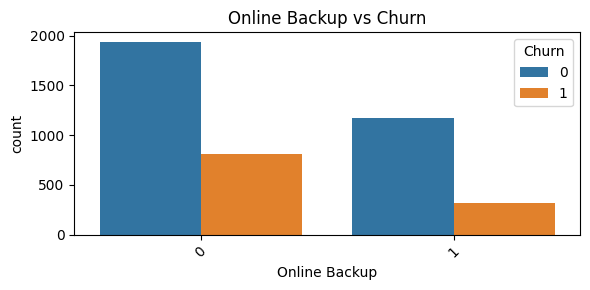

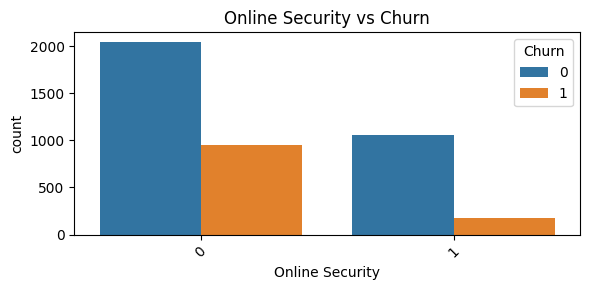

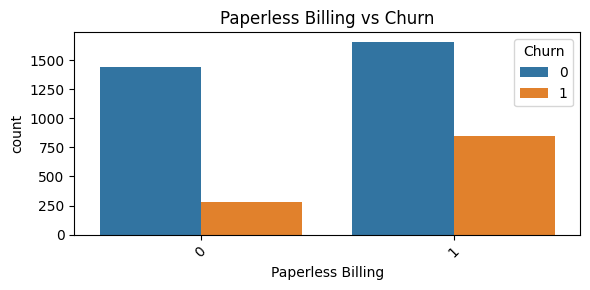

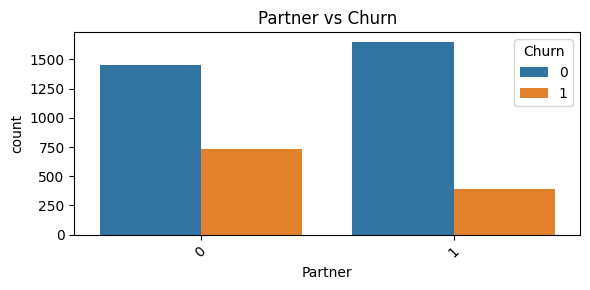

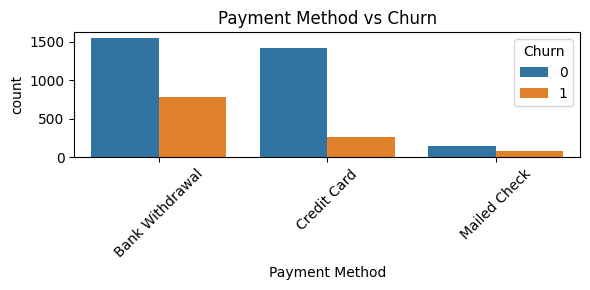

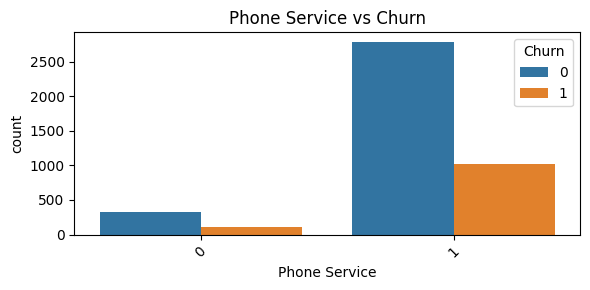

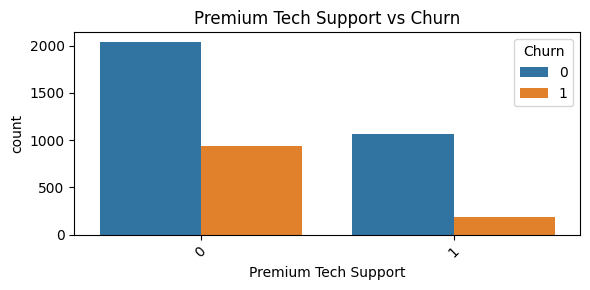

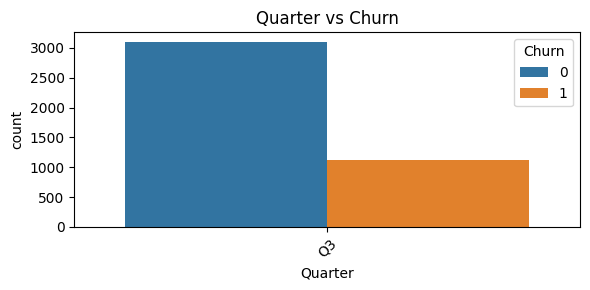

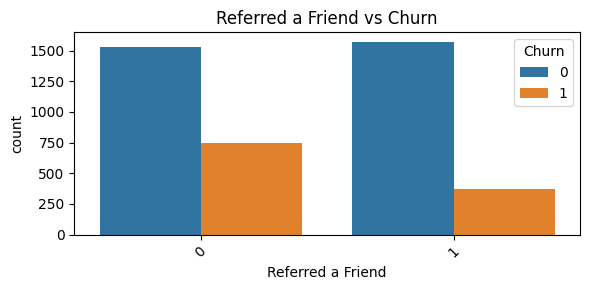

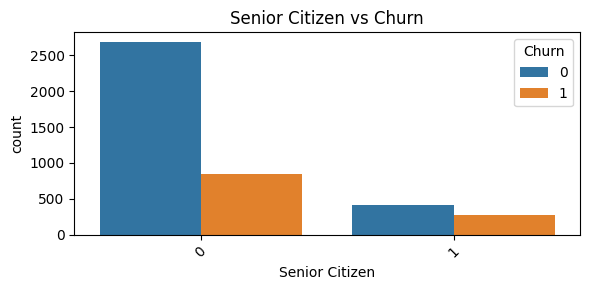

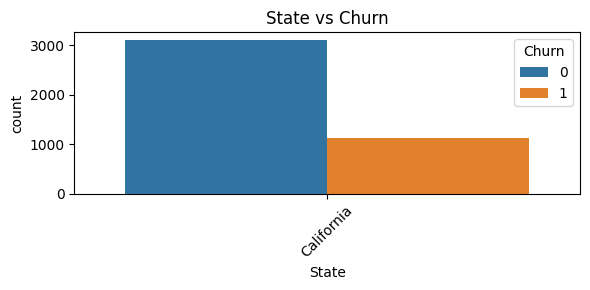

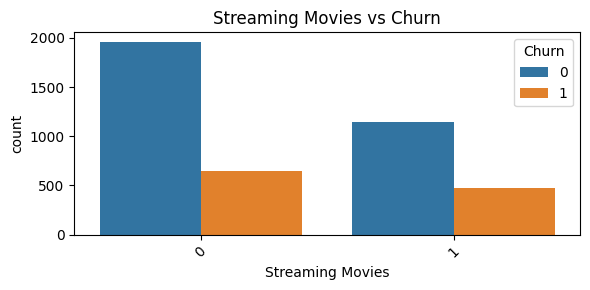

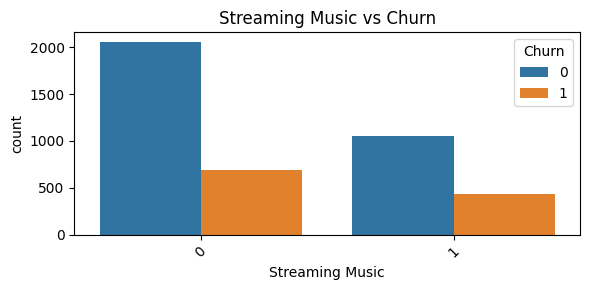

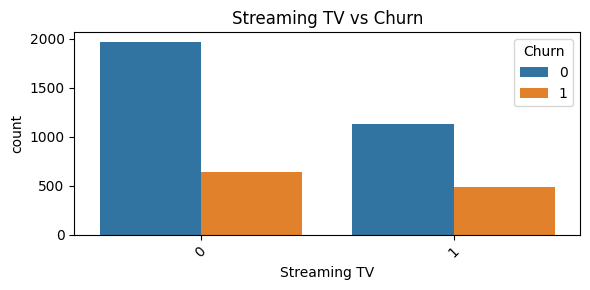

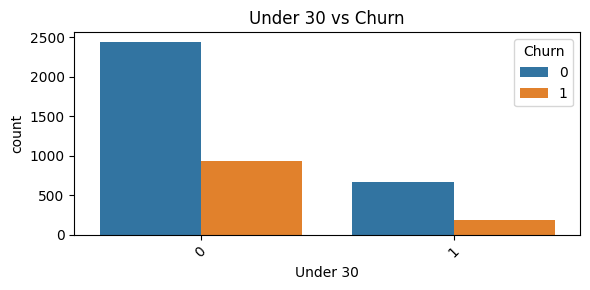

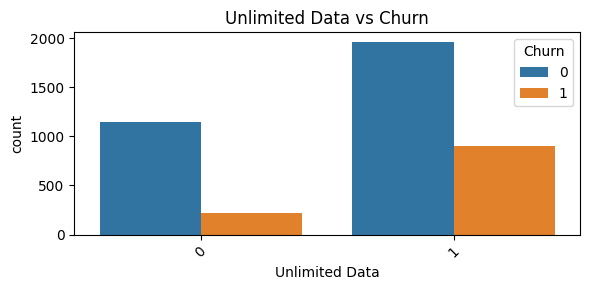

In [10]:
cat_cols = df_eda.select_dtypes('category').columns

for col in cat_cols:
    plt.figure(figsize=(6,3))
    sns.countplot(data=df_eda, x=col, hue='Churn')
    plt.title(f'{col} vs Churn')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()



In [27]:
df_eda = df_eda.drop(columns=['Lat Long','Customer ID', 'City'])

### 众多变量与流失（Churn）的关系

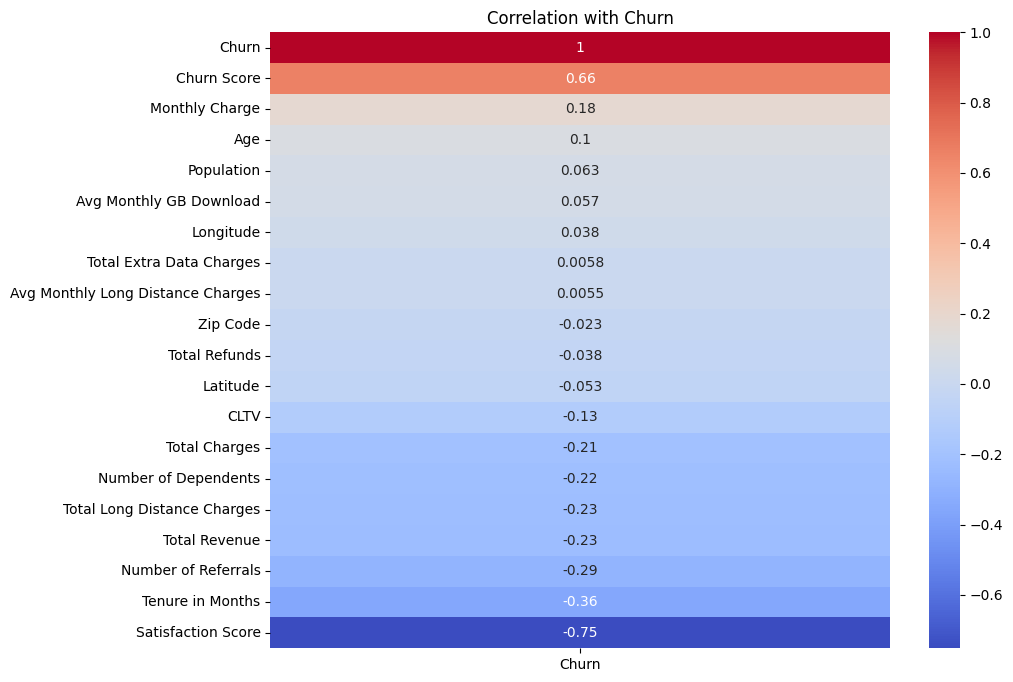

In [28]:
import numpy as np

corr = df_eda.corr(numeric_only=True)
plt.figure(figsize=(10,8))
sns.heatmap(corr[['Churn']].sort_values(by='Churn', ascending=False), annot=True, cmap='coolwarm')
plt.title('Correlation with Churn')
plt.show()


## EDA发现总结
结合可视化与相关性分析，可以提出以下待模型验证的假设：

1. 合约长度假设：
    长期合约客户的流失率显著低于短期合约客户。

2. 满意度假设：
    客户满意度是预测流失的最强变量，满意度越高，流失概率越低。

3. 参与度假设：
    拥有更多推荐记录、附属账户或额外服务的客户流失率更低。

4. 价格敏感性假设：
    月费较高的客户更容易流失，尤其是短期或新用户。

5. 人口属性假设：
    性别与城市差异对流失影响较小，可作为次要特征。

## Part3. 建模准备

 对所有分类变量做 one-hot 编码，数值变量仍然保留在 df_encoded 里原封不动参与训练。

In [29]:
cat_cols = df_eda.select_dtypes(include=['category']).columns.tolist()
df_encoded = pd.get_dummies(df_eda, columns=cat_cols, drop_first=True)

In [30]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


## Part4. 建模并分析问题

## 问题一、哪些特征最具预测性？
- 确定最重要的预测因素（例如，任期、合同类型、月租费）。
- 使用模型：LogisticRegression，RandomForestClassifier，LightGBM

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import numpy as np

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

logit = LogisticRegression(max_iter=1000, class_weight='balanced')
logit.fit(X_train_scaled, y_train)

importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': logit.coef_[0],
    'AbsCoef': np.abs(logit.coef_[0])
}).sort_values('AbsCoef', ascending=False)

importance.head(20)


,Feature,Coefficient,AbsCoef
22,Customer Status_Stayed,-4.366466,4.366466
21,Customer Status_Joined,-2.140622,2.140622
11,Satisfaction Score,-1.704533,1.704533
3,Churn Score,1.234254,1.234254
33,Online Security_1,-0.388077,0.388077
9,Number of Referrals,-0.327208,0.327208
20,Contract_Two Year,-0.278958,0.278958
23,Dependents_1,-0.181361,0.181361
19,Contract_One Year,-0.137465,0.137465
39,Premium Tech Support_1,-0.132488,0.132488


## 存在数据泄漏，删除泄漏列

In [39]:
leaky = ['Churn Score', 'Customer Status', 'Customer Status_Stayed', 'Customer Status_Joined']
df_eda = df_eda.drop(columns=['Churn Score', 'Customer Status'])

df_clean = df_encoded.drop(columns=[c for c in leaky if c in df_encoded.columns])

X = df_clean.drop('Churn', axis=1)
y = df_clean['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [34]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42, n_estimators=300, class_weight='balanced')
rf.fit(X_train, y_train)

rf_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values('Importance', ascending=False)

rf_importance.head(10)


,Feature,Importance
10,Satisfaction Score,0.403048
19,Contract_Two Year,0.059119
8,Number of Referrals,0.050798
11,Tenure in Months,0.046115
6,Monthly Charge,0.033572
12,Total Charges,0.031582
16,Total Revenue,0.029776
14,Total Long Distance Charges,0.025674
1,Avg Monthly GB Download,0.023443
4,Latitude,0.019205


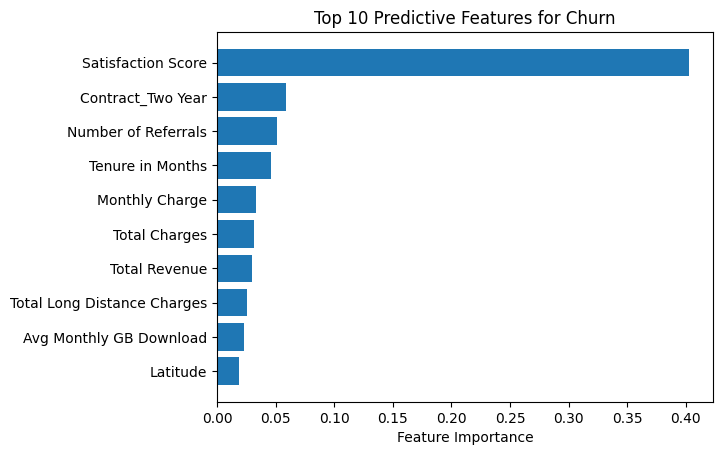

In [35]:
import matplotlib.pyplot as plt

top10 = rf_importance.head(10)
plt.barh(top10['Feature'], top10['Importance'])
plt.gca().invert_yaxis()
plt.title("Top 10 Predictive Features for Churn")
plt.xlabel("Feature Importance")
plt.show()


In [43]:
df = df_eda
# ========= Auto-detect numeric & categorical for LightGBM =========
import numpy as np
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, average_precision_score, classification_report

# ---- 0) 配置 ----
TARGET = "Churn"
TEST_SIZE = 0.2
RANDOM_STATE = 42

# ---- 1) 目标列清洗 → 0/1 ----
df = df.copy()
if df[TARGET].dtype.name not in ("int64","int32","int8","uint8"):
    # 常见映射，可按需修改
    mapping = {"yes":1,"no":0,"Yes":1,"No":0,"Y":1,"N":0, True:1, False:0}
    df[TARGET] = df[TARGET].map(mapping).fillna(df[TARGET]).astype(int)

# ---- 2) 自动识别列类型 ----
all_cols = [c for c in df.columns if c != TARGET]

# 2.1 原始 object → categorical
cat_cols = [c for c in all_cols if df[c].dtype == "object"]

# 2.2 已是 category 的也纳入
cat_cols += [c for c in all_cols if str(df[c].dtype) == "category"]

# 2.3 数值列中“二元”的，转为 category（更利于树模型）
num_like = [c for c in all_cols if c not in cat_cols]
binary_num_cols = [c for c in num_like
                   if np.issubdtype(df[c].dtype, np.number) and df[c].nunique(dropna=True) == 2]

# 2.4 做类型转换
for c in set(cat_cols + binary_num_cols):
    df[c] = df[c].astype("category")
# 重新统计最终的类别列
cat_cols = sorted([c for c in all_cols if str(df[c].dtype) == "category"])

# 2.5 数值列 = 剩下的非类别列（含 float/int）
num_cols = sorted([c for c in all_cols if c not in cat_cols])

# ---- 3) 缺失值处理（简洁版）----
# 数值列：中位数填充；类别列：用 '__MISSING__' 占位
for c in num_cols:
    if df[c].isna().any():
        df[c] = df[c].fillna(df[c].median())
for c in cat_cols:
    if df[c].isna().any():
        df[c] = df[c].cat.add_categories(["__MISSING__"]).fillna("__MISSING__")

# ---- 4) 组装数据并切分 ----
X = df[cat_cols + num_cols]
y = df[TARGET].astype(int)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE, stratify=y
)

# ---- 5) LightGBM Dataset（关键：传 categorical_feature）----
train_data = lgb.Dataset(X_train, label=y_train, categorical_feature=cat_cols, free_raw_data=False)
valid_data = lgb.Dataset(X_test,  label=y_test,  categorical_feature=cat_cols, free_raw_data=False)

# ---- 6) 训练 ----
params = {
    "objective": "binary",
    "metric": ["auc", "binary_logloss"],
    "learning_rate": 0.05,
    "num_leaves": 31,
    "feature_fraction": 0.9,
    "bagging_fraction": 0.9,
    "bagging_freq": 1,
    "lambda_l2": 1.0,
}
# 类别不平衡自动处理
pos, neg = y_train.sum(), len(y_train) - y_train.sum()
if pos > 0:
    params["scale_pos_weight"] = neg / pos

model = lgb.train(
    params,
    train_set=train_data,
    valid_sets=[train_data, valid_data],
    valid_names=["train","valid"],
    num_boost_round=500
)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 897, number of negative: 2483
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002100 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2931
[LightGBM] [Info] Number of data points in the train set: 3380, number of used features: 40
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265385 -> initscore=-1.018167
[LightGBM] [Info] Start training from score -1.018167
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positi

ROC-AUC=0.9945 | PR-AUC=0.9878
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       621
           1       0.96      0.92      0.94       224

    accuracy                           0.97       845
   macro avg       0.97      0.96      0.96       845
weighted avg       0.97      0.97      0.97       845



Text(0.5, 1.0, 'Top Features (gain)')

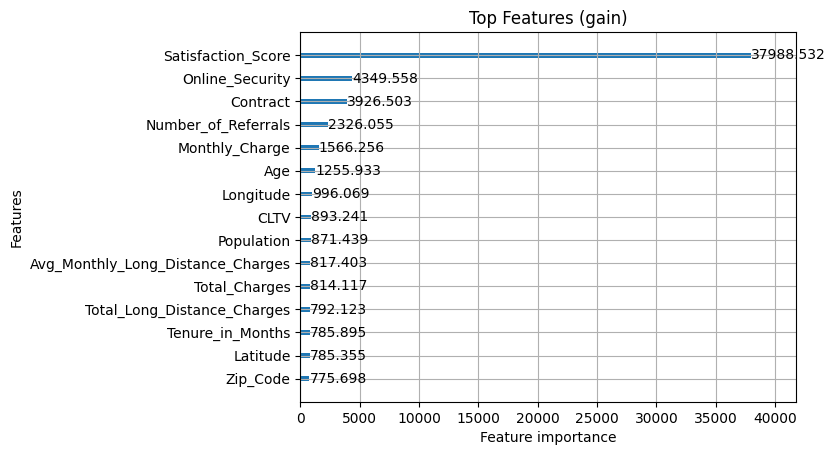

In [44]:
# ---- 7) 评估 ----
proba = model.predict(X_test, num_iteration=model.best_iteration)
auc = roc_auc_score(y_test, proba)
pr_auc = average_precision_score(y_test, proba)
print(f"ROC-AUC={auc:.4f} | PR-AUC={pr_auc:.4f}")
print(classification_report(y_test, (proba>=0.5).astype(int)))

# ---- 8) 特征重要性 ----
ax = lgb.plot_importance(model, max_num_features=15, importance_type="gain")
ax.set_title("Top Features (gain)")

## 问题一结论：
1. 满意度（Satisfaction）与流失率呈最强负相关 (r = -0.75)。说明客户感知质量直接决定留存。
2. 安全类附加服务、长期合约显著提升留存。客户一旦绑定多产品或年约，续约率高。
3. 推荐他人或有家庭账户（Dependents）的客户忠诚度更强。

### 可指定策略：
1. 生命周期效应 -> 新客户流失率明显高于老客户，需重点经营前 6 个月体验。
2. 价格敏感度 -> 月费过高群体的流失率上升，说明可考虑分层定价或优惠策略。
